In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,SLP,H,W,V,VM,PM 2.5
0,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
# Splitting into independent and dependent

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

##### Null values

<AxesSubplot:>

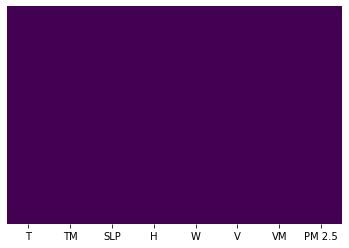

In [3]:
## Checking null values

sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [6]:
X.isnull().sum()

T      0
TM     0
SLP    0
H      0
W      0
V      0
VM     0
dtype: int64

In [7]:
y.isnull().sum()

2

In [13]:
## Replacing the null values with median
y.fillna(y.median(),inplace=True)

In [14]:
y.isnull().sum()

0

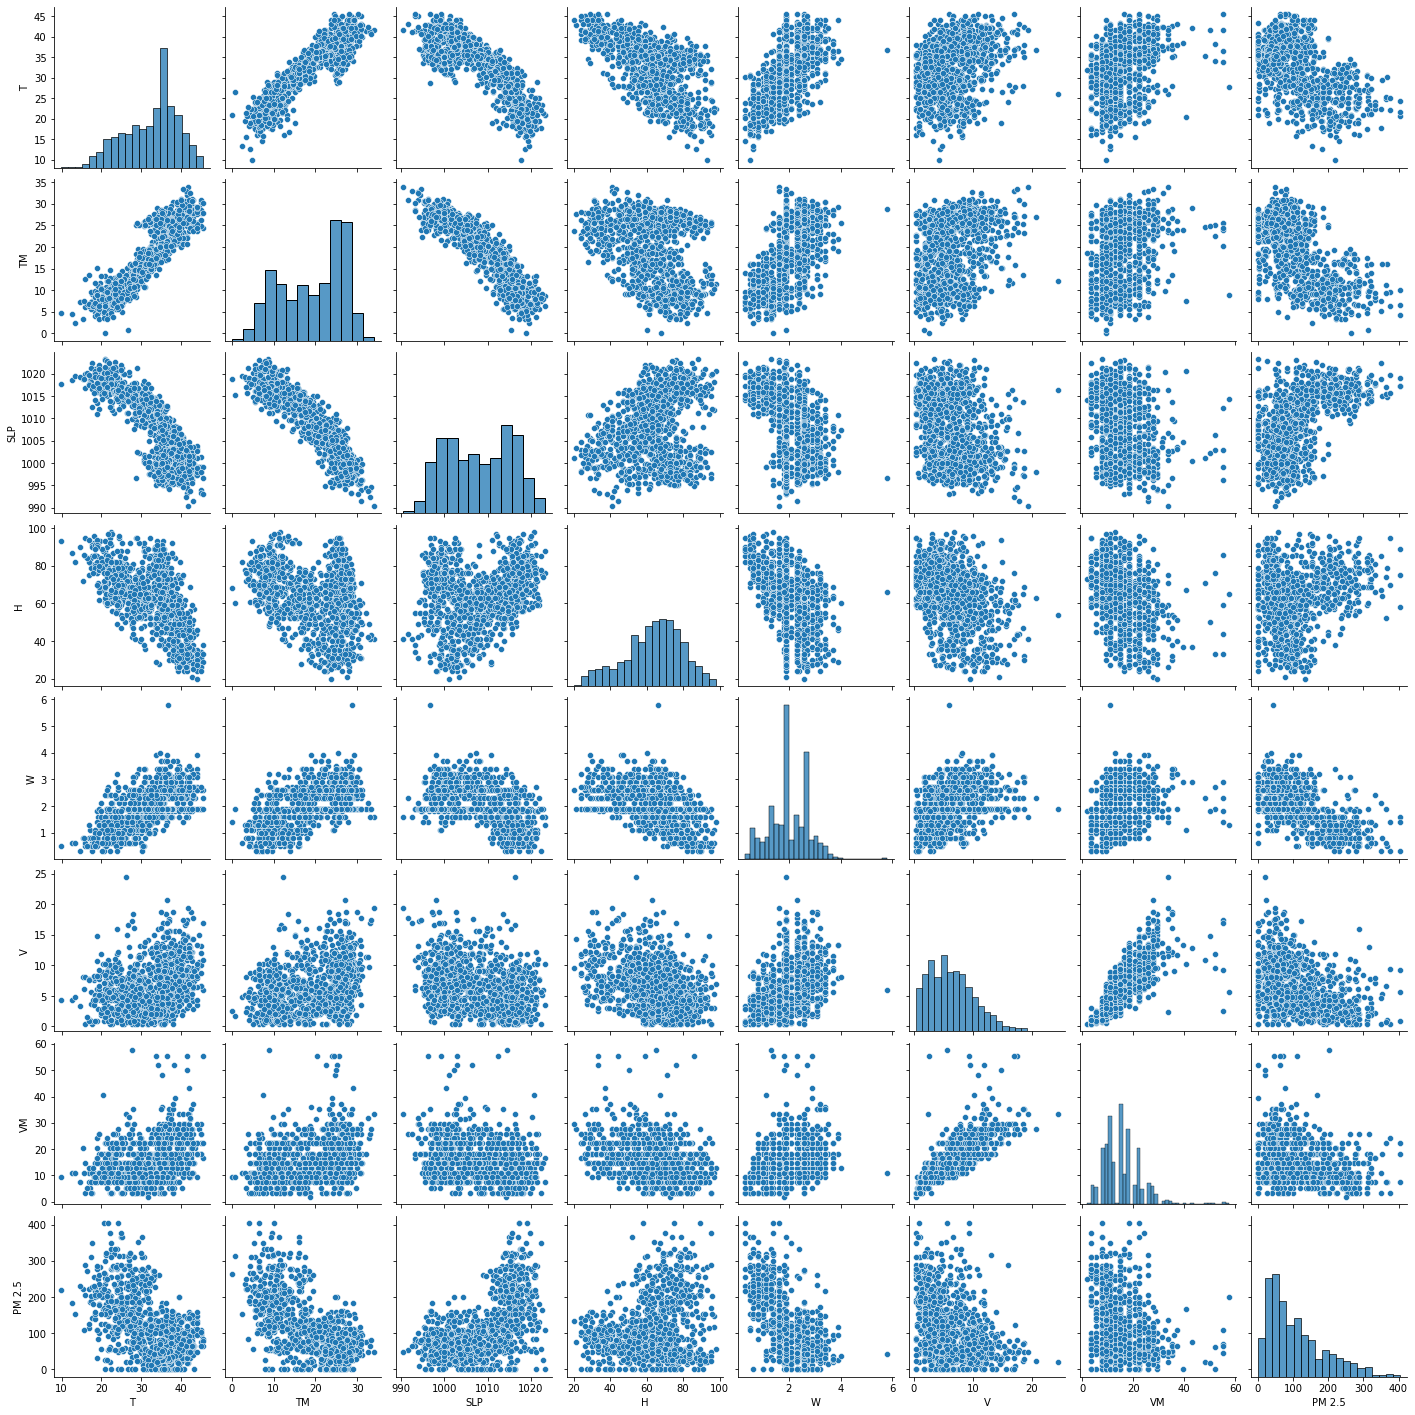

In [15]:
## plotting pair plot

sns.pairplot(df)

In [16]:
df.corr()

,T,TM,SLP,H,W,V,VM,PM 2.5
T,1.000000,0.890031,-0.826855,-0.578285,0.599440,0.303692,0.283925,-0.562919
TM,0.890031,1.000000,-0.912609,-0.276854,0.549046,0.312590,0.241625,-0.659151
SLP,-0.826855,-0.912609,1.000000,0.234626,-0.485044,-0.326291,-0.266878,0.603016
H,-0.578285,-0.276854,0.234626,1.000000,-0.489966,-0.356558,-0.367956,0.165652
W,0.599440,0.549046,-0.485044,-0.489966,1.000000,0.370150,0.323427,-0.591828
V,0.303692,0.312590,-0.326291,-0.356558,0.370150,1.000000,0.779732,-0.327593
VM,0.283925,0.241625,-0.266878,-0.367956,0.323427,0.779732,1.000000,-0.262768
PM 2.5,-0.562919,-0.659151,0.603016,0.165652,-0.591828,-0.327593,-0.262768,1.000000


<AxesSubplot:>

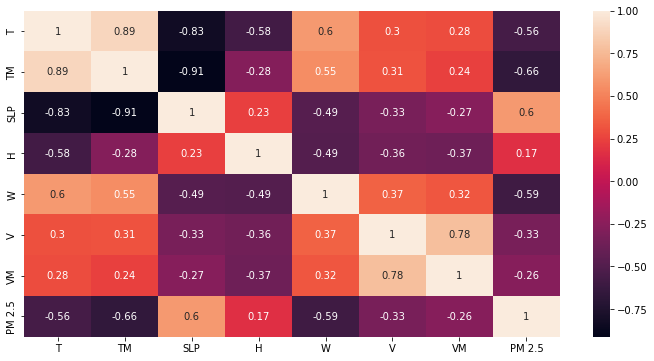

In [22]:
### correlation with heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

##### Feature Selection

In [23]:
### Feature importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.12531902 0.25624851 0.17721261 0.09012613 0.23212521 0.0702452
 0.04872332]


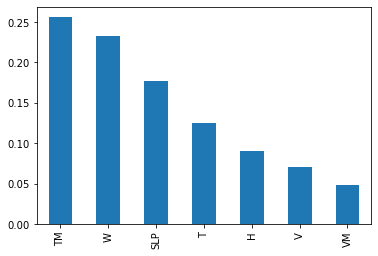

In [25]:
## Plotting Graph of feature importance

feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot.bar()
plt.show()

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

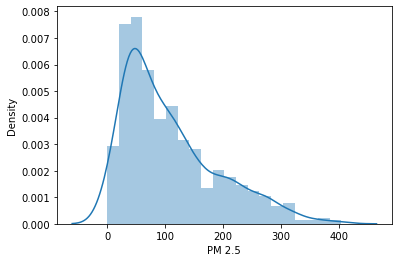

In [27]:
### Distplot

sns.distplot(y)

In [28]:
### Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
print('coefficient of determination R^2 on train set: {}'.format(regressor.score(X_train,y_train)))

coefficient of determination R^2 on train set: 0.5367496771549192


In [31]:
print('coefficient of determination R^2 on test set: {}'.format(regressor.score(X_test,y_test)))

coefficient of determination R^2 on test set: 0.5450187186872884


In [33]:
### Slope

regressor.coef_

array([  0.14646424,  -5.0781076 ,   0.16789254,  -0.95473167,
       -42.2997781 ,  -0.85190171,  -0.79409156])

In [34]:
### intercept

regressor.intercept_

195.52260757310427

In [32]:
### cross validation score
from sklearn.model_selection import cross_val_score

score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.49718171907658315

In [37]:
#### Model Evaluation

coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.146464
TM,-5.078108
SLP,0.167893
H,-0.954732
W,-42.299778
V,-0.851902
VM,-0.794092


interpretting the coefficient

1. Holding all other features fixed, a 1 unit increase in TM is associated with an decrease of 5.0781 in pm 2.5
2. Holding all other features fixed, a 1 unit increase in T is associated with an increase of 0.1464 in pm 2.5

In [39]:
### prediction

prediction=regressor.predict(X_test)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

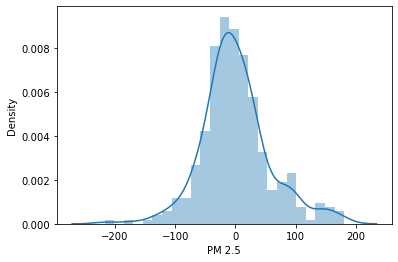

In [40]:
sns.distplot(y_test-prediction)

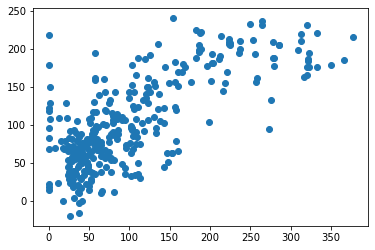

In [42]:
plt.scatter(y_test,prediction)

### Evaluation metrics

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MSE: {}'.format(mean_squared_error(y_test,prediction)))
print('MAE: {}'.format(mean_absolute_error(y_test,prediction)))
print('RMSE: {}'.format(np.sqrt(mean_absolute_error(y_test,prediction))))

MSE: 3258.2905060421563
MAE: 41.67296376440716
RMSE: 6.455459996344734


In [51]:
from sklearn.metrics import r2_score

score=r2_score(y_test,prediction)
score

0.5450187186872884

In [53]:
## Adjusted r^2

Adj_r2 = 1 - (1-r2_score(y_test, prediction)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.5420752168673355

In [56]:
### ols
import statsmodels.api as sm
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 PM 2.5   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              768.0
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:43:27   Log-Likelihood:                         -5927.2
No. Observations:                1090   AIC:                                  1.187e+04
Df Residuals:                    1083   BIC:                                  1.190e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T              1.0832      0.874      1.239      0.216      -0.632       2.799
TM            -5.5117      0.704     -7.830      0.000      -6.893      -4.131
SLP            0.3342      0.028     11.936      0.000       0.279       0.389
H             -0.8358      0.189     -4.431      0.000      -1.206      -0.466
W            -44.2594      3.096    -14.296      0.000     -50.334     -38.185
V             -1.5183      0.735     -2.066      0.039      -2.960      -0.076
VM            -0.3604      0.363     -0.994      0.321      -1.072       0.351
==============================================================================
Omnibus:                       78.032   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.290
Skew:                           0.474   Prob(JB):                     8.52e-34
Kurtosis:                       4.567   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""